In [1]:
#Visualizing Citibike data

In [2]:
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from datetime import datetime
from matplotlib import dates
%matplotlib inline

In [6]:
#Reading the file and converting starttime to a date string
dt_parse=lambda x: datetime.strptime(x,'%m/%d/%Y %H:%M:%S')
#dt_parse=lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S')

In [7]:
data_iter=pd.read_csv('201510-citibike-tripdata.csv', usecols=(0,1,12,14), parse_dates=['starttime'], date_parser=dt_parse, iterator=True, chunksize=1000)
jul=pd.concat(data_iter)

In [8]:
#finding the mean
m=np.mean(jul['tripduration'],dtype=np.float64)

In [9]:
#gleaning the hour of starttime, which we will distribute among our bins in the histogram
jul['starttime']=(pd.DatetimeIndex(jul['starttime'])).hour

In [10]:
#Tallying the gender and customer ratios
male= female= unknown= cust= subs=0
mst,fst,ust=[],[],[] #mst=male start time

In [11]:
for i in xrange(0,len(jul)):
	if jul['gender'].values[i]==1:
		male+=1
		mst.append(jul['starttime'].values[i])
	elif jul['gender'].values[i]==2:
		female+=1
		fst.append(jul['starttime'].values[i])
	else:
		unknown+=1
		ust.append(jul['starttime'].values[i])
	if jul['usertype'].values[i]=='Customer':
		cust+=1
	else:
		subs+=1

In [12]:
print 'Average Trip Duration = {0:.2f} seconds' .format(m)
print 'Total number of Customers = %d\nTotal Number of Subscribers = %d\nTotal number of Male Users = %d\nTotal\
number of Female users = %d\nTotal Number of Users whose Gender is unknown = %d' %(cust,subs,male,female,unknown)


Average Trip Duration = 1079.95 seconds
Total number of Customers = 146511
Total Number of Subscribers = 1065766
Total number of Male Users = 807097
Totalnumber of Female users = 256792
Total Number of Users whose Gender is unknown = 148388


In [13]:
num_bins1=range(0,25,1)
num_bins2=range(0,25,4)

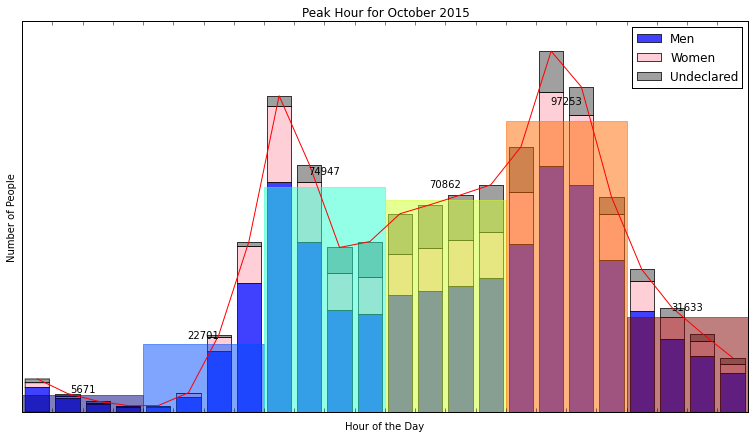

In [41]:
#print 'plotting the histogram'

fig=plt.figure(figsize=(13,7))
fig.gca()
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.xticks([],[])
plt.yticks([],[])

#plt.sublots_adjust(wspace=0.5,hspace=0.3,left=0.2,right=0.5,top=0.5, bottom=0.5)
ax1=fig.add_subplot(111)
n1,bins1,arrays1=ax1.hist([mst,fst,ust],num_bins1,histtype='bar',alpha=0.75, stacked=True, color=['blue','pink','grey'], label=['Men','Women','Undeclared'])

#best fit line
ax2=fig.add_subplot(111)
x=np.linspace(0.5,23.5,24)
ax2.plot(x,n1[2],'r-')

ax3=fig.add_subplot(111)
n2,bins2=np.histogram(jul['starttime'],num_bins2)
barlist=ax3.bar([0,4,8,12,16,20],n2/4.0, width=4, alpha=0.5)
jet=pl.get_cmap('jet',len(barlist))#colours!
for i in range(len(barlist)):
	barlist[i].set_color(jet(i))
for bar in barlist:
	height=bar.get_height()
	ax3.text(bar.get_x()+bar.get_width()/2., 1.05*height, '%d'%int(height),ha='center',va='bottom')

plt.xticks(np.arange(1,25))
plt.xlabel('Hour of the Day')
plt.ylabel('Number of People')
plt.title('Peak Hour for October 2015')
plt.legend(loc='upper right')
ax1.set_xlim(right=24)
ax1.set_ylim(top=max(n1[2]+10000))
plt.show()

In [42]:
np.arange(1,25)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])